# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#%matplotlib inline
"""
from IPython.core.pylabtools import figsize
figsize(12, 8)

sns.set()
"""

'\nfrom IPython.core.pylabtools import figsize\nfigsize(12, 8)\n\nsns.set()\n'

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

#### Características dos dados

In [5]:
print(f'Linhas: {athletes.shape[0]} | Colunas: {athletes.shape[1]}')

Linhas: 11538 | Colunas: 11


In [6]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [7]:
print(f'Colunas presentes: {athletes.columns.values}')

Colunas presentes: ['id' 'name' 'nationality' 'sex' 'dob' 'height' 'weight' 'sport' 'gold'
 'silver' 'bronze']


In [8]:
print(f'Tipos dos dados: {athletes.dtypes.unique()}')

Tipos dos dados: [dtype('int64') dtype('O') dtype('float64')]


#### Estatística dos dados

In [9]:
athletes.drop(['id'], axis=1).describe()

,height,weight,gold,silver,bronze
count,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,1.766282,72.068205,0.057722,0.056769,0.061016
std,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.210000,31.000000,0.000000,0.000000,0.000000
25%,1.690000,60.000000,0.000000,0.000000,0.000000
50%,1.760000,70.000000,0.000000,0.000000,0.000000
75%,1.840000,81.000000,0.000000,0.000000,0.000000
max,2.210000,170.000000,5.000000,2.000000,2.000000


In [10]:
athletes.describe(include='O')

,name,nationality,sex,dob,sport
count,11538,11538,11538,11537,11538
unique,11517,207,2,5595,28
top,Luis Lopez,USA,male,12/20/90,athletics
freq,2,567,6333,9,2363


#### Visualizando os dados nulos

In [11]:
data_missing = pd.DataFrame({'nomes': athletes.columns, 
                             'tipos': athletes.dtypes, 
                             'NA #': athletes.isna().sum(),
                             'NA %': (athletes.isna().sum() / athletes.shape[0]) * 100
                            })

data_missing[data_missing['NA #'] > 0].set_index('nomes')

,tipos,NA #,NA %
nomes,,,
dob,object,1,0.008667
height,float64,330,2.860114
weight,float64,659,5.711562


In [12]:
import scipy

alpha = 0.05
sample_height = get_sample(athletes, 'height', 3000)
sample_weight = get_sample(athletes, 'weight', 3000)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [13]:
def q1():  
    stat, p = scipy.stats.shapiro(sample_height)
    return p > alpha

In [14]:
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

#### Histograma

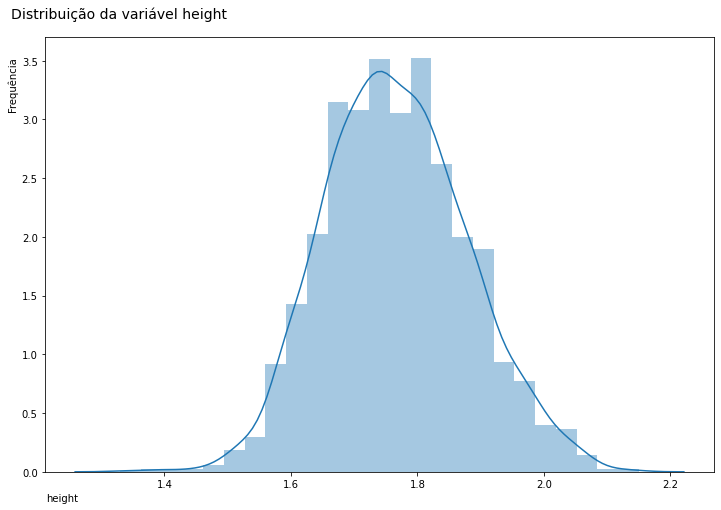

In [38]:
plt.rcParams['figure.figsize'] = [12, 8]

sns.distplot(sample_height, bins=25)

plt.title('Distribuição da variável height', y=1.03, size=14, loc='left', x=-0.05)
plt.ylabel('Frequência', horizontalalignment='left', y=0.83)
plt.xlabel('height', horizontalalignment='right', x=0.05)
plt.show()

#### qq-plot

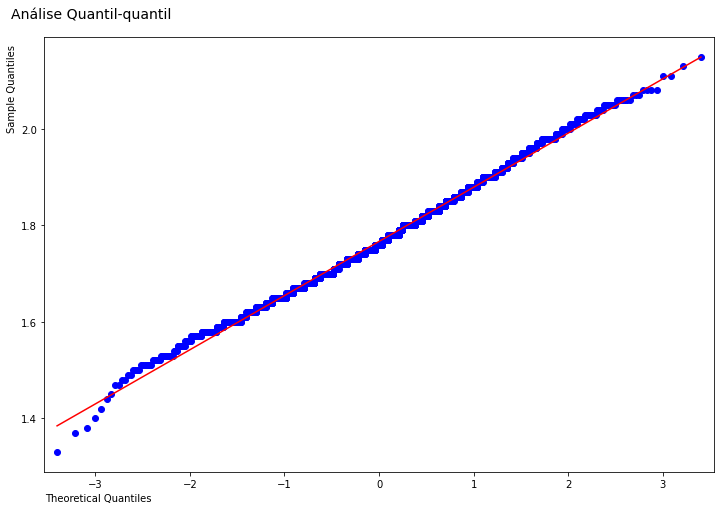

In [43]:
from statsmodels.graphics.gofplots import qqplot

plt.rcParams['figure.figsize'] = [12, 8]

qqplot(sample_height, line='s')

plt.title('Análise Quantil-quantil', y=1.03, size=14, loc='left', x=-0.05)
plt.ylabel('Sample Quantiles', horizontalalignment='left', y=0.78)
plt.xlabel('Theoretical Quantiles', horizontalalignment='right', x=0.16)
plt.show()

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [17]:
def q2():
    stat, p = scipy.stats.jarque_bera(sample_height)
    return p > alpha

In [18]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [19]:
def q3():
    stat, p = scipy.stats.normaltest(sample_weight)
    return p > alpha

In [20]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

#### Histograma

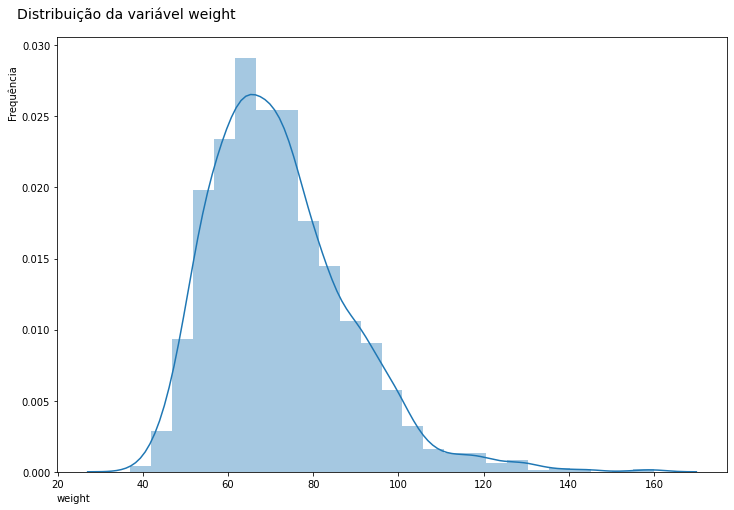

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]

sns.distplot(sample_weight, bins=25)

plt.title('Distribuição da variável weight', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('Frequência', horizontalalignment='left', y=0.81)
plt.xlabel('weight', horizontalalignment='right', x=0.05)
plt.show()

#### Boxplot

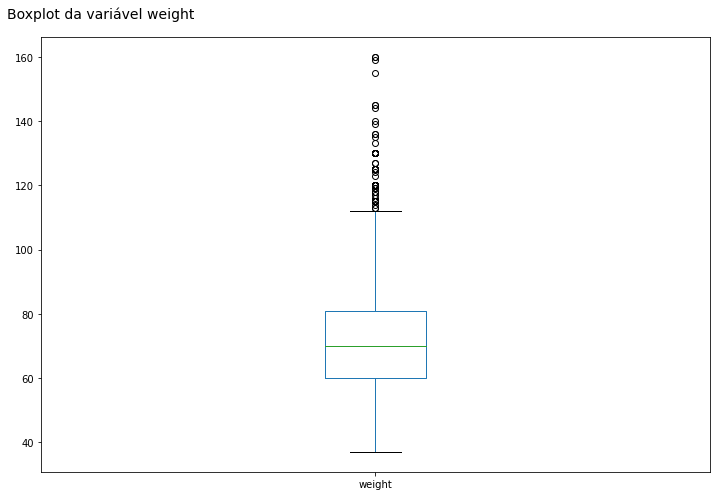

In [22]:
plt.rcParams['figure.figsize'] = [12, 8]

sample_weight.plot(kind='box')

plt.title('Boxplot da variável weight', y=1.03, size=14, loc='left', x=-0.05)
plt.show()

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [23]:
def q4():
    log = np.log(sample_weight)
    stat, p = scipy.stats.normaltest(log)
    return p > alpha

In [24]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

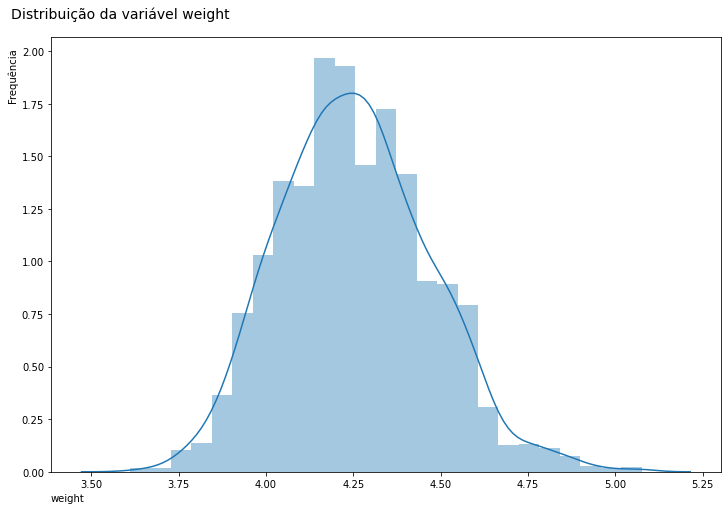

In [48]:
plt.rcParams['figure.figsize'] = [12, 8]

sns.distplot(np.log(sample_weight), bins=25)

plt.title('Distribuição da variável weight', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('Frequência', horizontalalignment='left', y=0.85)
plt.xlabel('weight', horizontalalignment='right', x=0.05)
plt.show()

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [26]:
bra = athletes.query('nationality=="BRA"')['height'].dropna()
usa = athletes.query('nationality=="USA"')['height'].dropna()
can = athletes.query('nationality=="CAN"')['height'].dropna()

In [27]:
def q5():
    stat, p = scipy.stats.ttest_ind(bra, usa)
    return p > alpha

In [28]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [29]:
def q6():
    stat, p = scipy.stats.ttest_ind(bra, can)
    return p > alpha

In [30]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [31]:
def q7():
    _, p = scipy.stats.ttest_ind(usa, can, equal_var=False)
    return round(p, 8)

In [32]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?